In [192]:
#李子霄 2017301020223 第二次作业

致谢：感谢丁远泽提供用numba加速for语句的方法

In [161]:
import math
import numpy as np
import time
import sympy
import numba
from numba import jit
from sympy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
N=10000

In [55]:
@jit(nopython=True)
def getnext(x,a,n):
    nexta=numba.float32(-x**2/((2*n-1)*(2*n-2))*a)
    return nexta


In [56]:
@jit(nopython=True)
def summation(x):
    a=x
    sers=x
    for n in range(2,N+1):
        sers+=np.float32(getnext(x,a,n))
        a=np.float32(getnext(x,a,n))
    if np.absolute(sers-np.sin(x))<10**-5:
        gx=x
        cor=sers
    return sers,gx,cor

In [59]:
def main():
    result=np.array([])
    x=np.array([])
    cx=0
    maxx=6*np.pi##最大计算位置
    for xmax in np.arange(0.001,maxx,0.001):
        sers,gx,cor=summation(xmax)
        result=np.append(result,sers)
        x=np.append(x,xmax)
        if gx>cx and gx<maxx:
            cx=gx
            cy=cor
    truv=np.sin(x)
    p1,=plt.plot(x,result,label="Approximated value")
    p2,=plt.plot(x,truv,label="Exact value")
    plt.axvline(cx,color="blue")
    print(cx)
    print(N)
    plt.legend(handles=[p1,p2])
    plt.xlabel("x (rad)")
    plt.ylabel("Value of function Sin(x)")
    plt.savefig("sinx.png",dpi=300)
    plt.show()
    return 0


16.778000000000002
10000


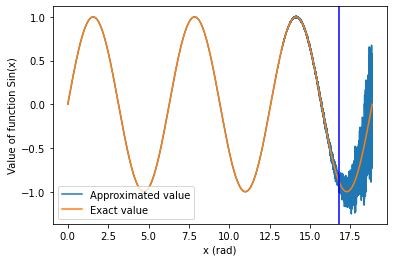

0

In [60]:
main()

作业二

In [162]:
s_up=numba.float32(0)
for n in range(1,N):#这表示从1到9999
    s_up+=numba.float32(1/n)
s_down=numba.float32(0)
for n in range(N-1,0,-1):#这表示从9999到1
    s_down+=numba.float32(1/n)
print(s_up)
print(s_down)

9.787513
9.787505


结果表明在Nmax=10000时down和up两种算法结果确实不同；接下来计算在N变化时，（up-down）/(up+down)的大小

In [182]:
@jit(nopython=True)
def S_up(N):
 S_up=np.float32(0)
 for i in range(1,N+1):
  S_up += np.float32(1/i)
 return S_up #定义S_up为对级数顺序求和
@jit(nopython=True)
def S_down(N):
 S_down=np.float32(0)
 for i in range(N):
   S_down += np.float32(1/N-i)
 return S_down #定义S_down为对级数倒序求和

In [188]:
#确定X，Y的值
Nmax=5000
Y=[]
X=[]
for N in range(1,Nmax+1):
 Y.append((S_up(N)-S_down(N))/(np.abs(S_up(N))+np.abs(S_down(N))))
 X.append(N)

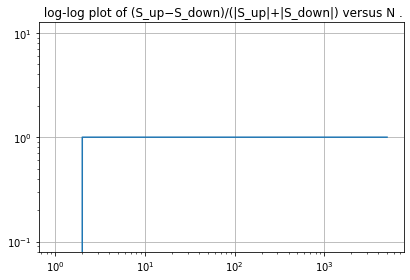

In [190]:
#画log-log图
fig,ax1 = plt.subplots(1, 1)
# log x and y axis
ax1.loglog(X, Y, basex=10, basey=10 )
ax1.set(title=' log-log plot of (S_up−S_down)/(|S_up|+|S_down|) versus N .')
ax1.grid()
fig.tight_layout()
plt.show()

在Nmax=5000的范围内好像没有差异...